<a href="https://colab.research.google.com/github/mepky/deep-learning/blob/master/convolution_autoencoder_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


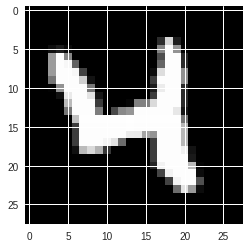

In [4]:
img=mnist.train.images[20]
plt.imshow(img.reshape((28,28)),cmap='Greys_r')

Exercise: Build the network shown above. Remember that a convolutional layer with strides of 1 and 'same' padding won't reduce the height and width. That is, if the input is 28x28 and the convolution layer has stride = 1 and 'same' padding, the convolutional layer will also be 28x28. The max-pool layers are used the reduce the width and height. A stride of 2 will reduce the size by a factor of 2. Odena et al claim that nearest neighbor interpolation works best for the upsampling, so make sure to include that as a parameter in tf.image.resize_images or use tf.image.resize_nearest_neighbor. For convolutional layers, use tf.layers.conv2d. For example, you would write conv1 = tf.layers.conv2d(inputs, 32, (5,5), padding='same', activation=tf.nn.relu) for a layer with a depth of 32, a 5x5 kernel, stride of (1,1), padding is 'same', and a ReLU activation. Similarly, for the max-pool layers, use tf.layers.max_pooling2d.


In [5]:
learning_rate=0.001
#Input and target placeholders
inputs=tf.placeholder(tf.float32, (None,28,28,1),name='inputs')
targets=tf.placeholder(tf.float32,(None,28,28,1),name='targets')

###Encoder
conv1=tf.layers.conv2d(inputs,16,(3,3),padding='same',activation=tf.nn.relu)
#Now 28x28x16
maxpool1=tf.layers.max_pooling2d(conv1,(2,2),(2,2),padding='same')
#Now 14x14x16
conv2=tf.layers.conv2d(maxpool1,8,(3,3),padding='same',activation=tf.nn.relu)

#Now 14x14x8
maxpool2=tf.layers.max_pooling2d(conv2,(2,2),(2,2),padding='same')
#Now 7x7x8
conv3=tf.layers.conv2d(maxpool2,8,(3,3),padding='same',activation=tf.nn.relu)
#Now 4x4x8
encoded=tf.layers.max_pooling2d(conv3,(2,2),(2,2),padding='same')

### DECODER
upsample1=tf.image.resize_nearest_neighbor(encoded,(7,7))
# Now 7x7x8
conv4=tf.layers.conv2d(upsample1,8,(3,3),padding='same',activation=tf.nn.relu)


#Now 7x7x8
upsample2=tf.image.resize_nearest_neighbor(conv4,(14,14))

#Now 14x14x8
conv5 = tf.layers.conv2d(upsample2,8,(3,3),padding='same',activation=tf.nn.relu)

# Now 14x14x8
upsample3 = tf.image.resize_nearest_neighbor(conv5,(28,28))
# Now 28x28x8
conv6 = tf.layers.conv2d(upsample3,8,(3,3),padding='same',activation=tf.nn.relu)

# Now 28x28x16

logits = tf.layers.conv2d(conv6,1,(3,3),padding='same',activation=None)
#Now 28x28x1

# Pass logits through sigmoid to get reconstructed image
decoded =tf.nn.sigmoid(logits,name='decoded')

# Pass logits through sigmoid and calculate the cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets,logits=logits)
cost=tf.reduce_mean(loss)
# Get cost and define the optimizer
opt=tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.max_pooling2d instead.


In [9]:
sess=tf.Session()
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs: imgs,
                                                         targets: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6678
Epoch: 1/20... Training loss: 0.6576
Epoch: 1/20... Training loss: 0.6449
Epoch: 1/20... Training loss: 0.6308
Epoch: 1/20... Training loss: 0.6144
Epoch: 1/20... Training loss: 0.6001
Epoch: 1/20... Training loss: 0.5840
Epoch: 1/20... Training loss: 0.5677
Epoch: 1/20... Training loss: 0.5542
Epoch: 1/20... Training loss: 0.5498
Epoch: 1/20... Training loss: 0.5425
Epoch: 1/20... Training loss: 0.5510
Epoch: 1/20... Training loss: 0.5593
Epoch: 1/20... Training loss: 0.5555
Epoch: 1/20... Training loss: 0.5339
Epoch: 1/20... Training loss: 0.5323
Epoch: 1/20... Training loss: 0.5253
Epoch: 1/20... Training loss: 0.5131
Epoch: 1/20... Training loss: 0.5161
Epoch: 1/20... Training loss: 0.5021
Epoch: 1/20... Training loss: 0.5022
Epoch: 1/20... Training loss: 0.5051
Epoch: 1/20... Training loss: 0.4978
Epoch: 1/20... Training loss: 0.4940
Epoch: 1/20... Training loss: 0.4872
Epoch: 1/20... Training loss: 0.4854
Epoch: 1/20... Training loss: 0.4825
E

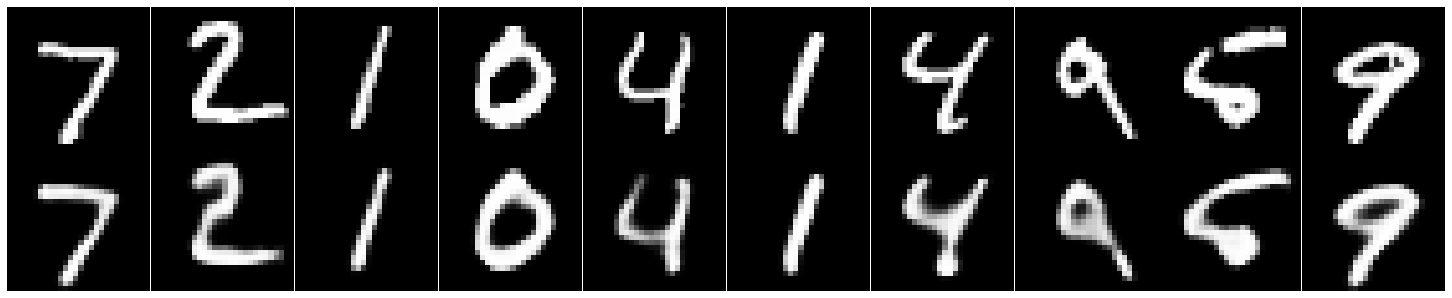

In [11]:

fig,axes=plt.subplots(nrows=2,ncols=10,sharex=True,sharey=True,figsize=(20,4))
in_imgs=mnist.test.images[:10]
reconstructed=sess.run(decoded,feed_dict={inputs:in_imgs.reshape((10,28,28,1))})

for images,row in zip([in_imgs,reconstructed],axes):
  for img,ax in zip(images,row):
    ax.imshow(img.reshape((28,28)),cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
fig.tight_layout(pad=0.1)




In [0]:

epochs = 100
batch_size = 200
# Set's how much noise we're adding to the MNIST images
noise_factor = 0.5
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        # Get images from the batch
        imgs = batch[0].reshape((-1, 28, 28, 1))
        
        # Add random noise to the input images
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        # Clip the images to be between 0 and 1
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        
        # Noisy images as inputs, original images as targets
        batch_cost, _ = sess.run([cost, opt], feed_dict={inputs: noisy_imgs,
                                                         targets: imgs})

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/100... Training loss: 0.6934
Epoch: 1/100... Training loss: 0.6902
Epoch: 1/100... Training loss: 0.6865
Epoch: 1/100... Training loss: 0.6814
Epoch: 1/100... Training loss: 0.6744
Epoch: 1/100... Training loss: 0.6660
Epoch: 1/100... Training loss: 0.6554
Epoch: 1/100... Training loss: 0.6439
Epoch: 1/100... Training loss: 0.6289
Epoch: 1/100... Training loss: 0.6138
Epoch: 1/100... Training loss: 0.5980
Epoch: 1/100... Training loss: 0.5781
Epoch: 1/100... Training loss: 0.5614
Epoch: 1/100... Training loss: 0.5432
Epoch: 1/100... Training loss: 0.5262
Epoch: 1/100... Training loss: 0.5205
Epoch: 1/100... Training loss: 0.5221
Epoch: 1/100... Training loss: 0.5285
Epoch: 1/100... Training loss: 0.5258
Epoch: 1/100... Training loss: 0.5542
Epoch: 1/100... Training loss: 0.5324
Epoch: 1/100... Training loss: 0.5227
Epoch: 1/100... Training loss: 0.5365
Epoch: 1/100... Training loss: 0.5075
Epoch: 1/100... Training loss: 0.5097
Epoch: 1/100... Training loss: 0.5047
Epoch: 1/100

NameError: ignored

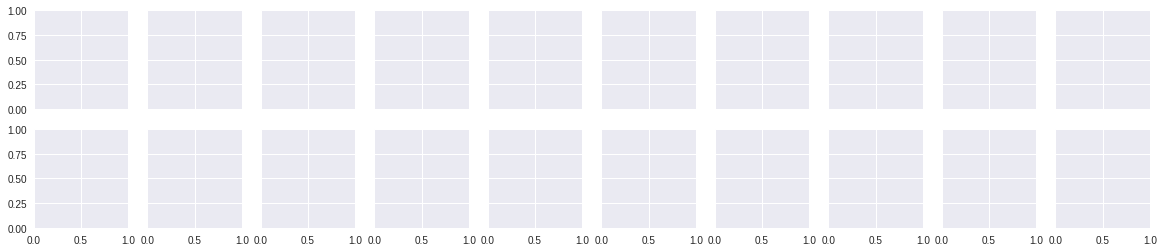

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={inputs_: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)